### Setup

In [1]:
!pip install --no-deps -q bitsandbytes

In [2]:
!pip install addict transformers==4.46.3 tokenizers==0.20.3

### OCR

In [5]:
from transformers import AutoModel, AutoTokenizer, BitsAndBytesConfig
import torch

model_name = 'deepseek-ai/DeepSeek-OCR'

In [6]:
qc = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float
)

In [7]:
tokenizer = AutoTokenizer.from_pretrained(model_name, trust_remote_code=True)
model = AutoModel.from_pretrained(
    model_name, trust_remote_code=True,
    use_safetensors=True, device_map="auto",
    quantization_config=qc, torch_dtype=torch.float
)
model = model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/801 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

modeling_deepseekocr.py: 0.00B [00:00, ?B/s]

modeling_deepseekv2.py: 0.00B [00:00, ?B/s]

configuration_deepseek_v2.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekv2.py
- configuration_deepseek_v2.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


deepencoder.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- deepencoder.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


conversation.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/deepseek-ai/DeepSeek-OCR:
- modeling_deepseekocr.py
- modeling_deepseekv2.py
- deepencoder.py
- conversation.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
You are using a model of type deepseek_vl_v2 to instantiate a model of type DeepseekOCR. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json: 0.00B [00:00, ?B/s]

model-00001-of-000001.safetensors:   0%|          | 0.00/6.67G [00:00<?, ?B/s]

Some weights of DeepseekOCRForCausalLM were not initialized from the model checkpoint at deepseek-ai/DeepSeek-OCR and are newly initialized: ['model.vision_model.embeddings.position_ids']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
prompt = "<image>\n<|grounding|>Convert the document to markdown."
# Prompts examples:
# document: <image>\n<|grounding|>Convert the document to markdown.
# other image: <image>\n<|grounding|>OCR this image.
# without layouts: <image>\nFree OCR.
# figures in document: <image>\nParse the figure.
# general: <image>\nDescribe this image in detail.
# rec: <image>\nLocate <|ref|>xxxx<|/ref|> in the image.

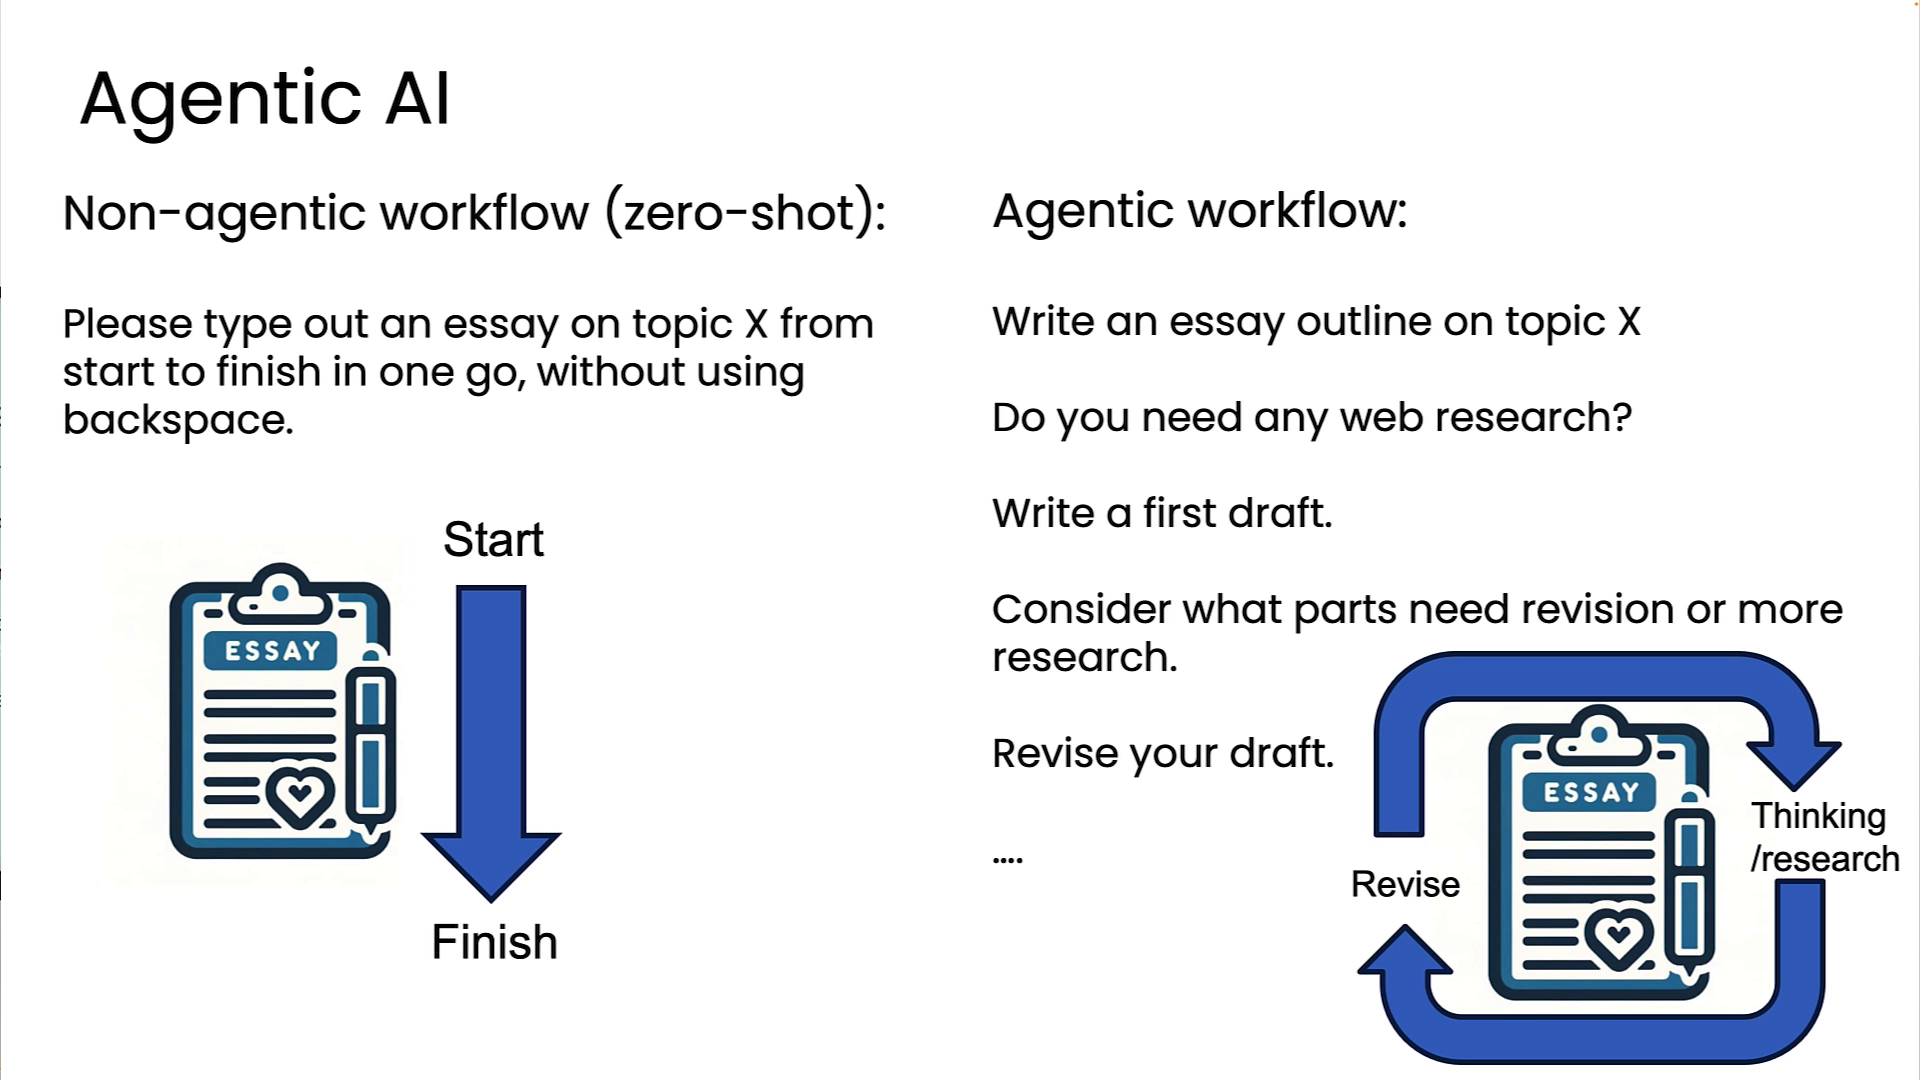

In [11]:
image_file = "/content/frame_01.png"
from IPython.display import Image
Image(image_file, width=640)

In [12]:
with torch.no_grad():
    res = model.infer(
        tokenizer,
        prompt=prompt,
        image_file=image_file,
        output_path=".",
        base_size=1024,
        image_size=1024,
        crop_mode=False,
        save_results=True,
        test_compress=True,
        eval_mode=False
    )

/usr/local/lib/python3.12/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Cal

BASE:  torch.Size([1, 256, 1280])
NO PATCHES
<|ref|>sub_title<|/ref|><|det|>[[38, 61, 237, 130]]<|/det|>
## Agentic AI  

<|ref|>text<|/ref|><|det|>[[30, 165, 461, 216]]<|/det|>
Non- agentic workflow (zero- shot):  

<|ref|>text<|/ref|><|det|>[[30, 271, 457, 410]]<|/det|>
Please type out an essay on topic X from start to finish in one go, without using backspace.  

<|ref|>image<|/ref|><|det|>[[82, 470, 297, 900]]<|/det|>  

<|ref|>text<|/ref|><|det|>[[513, 165, 733, 214]]<|/det|>
Agentic workflow:  

<|ref|>text<|/ref|><|det|>[[513, 271, 856, 315]]<|/det|>
Write an essay outline on topic X  

<|ref|>text<|/ref|><|det|>[[513, 365, 852, 408]]<|/det|>
Do you need any web research?  

<|ref|>text<|/ref|><|det|>[[513, 450, 693, 492]]<|/det|>
Write a first draft.  

<|ref|>text<|/ref|><|det|>[[513, 540, 960, 625]]<|/det|>
Consider what parts need revision or more research.  

<|ref|>text<|/ref|><|det|>[[513, 670, 693, 712]]<|/det|>
Revise your draft.  

<|ref|>text<|/ref|><|det|>[[513, 772,

other: 100%|██████████| 10/10 [00:00<00:00, 93000.09it/s]


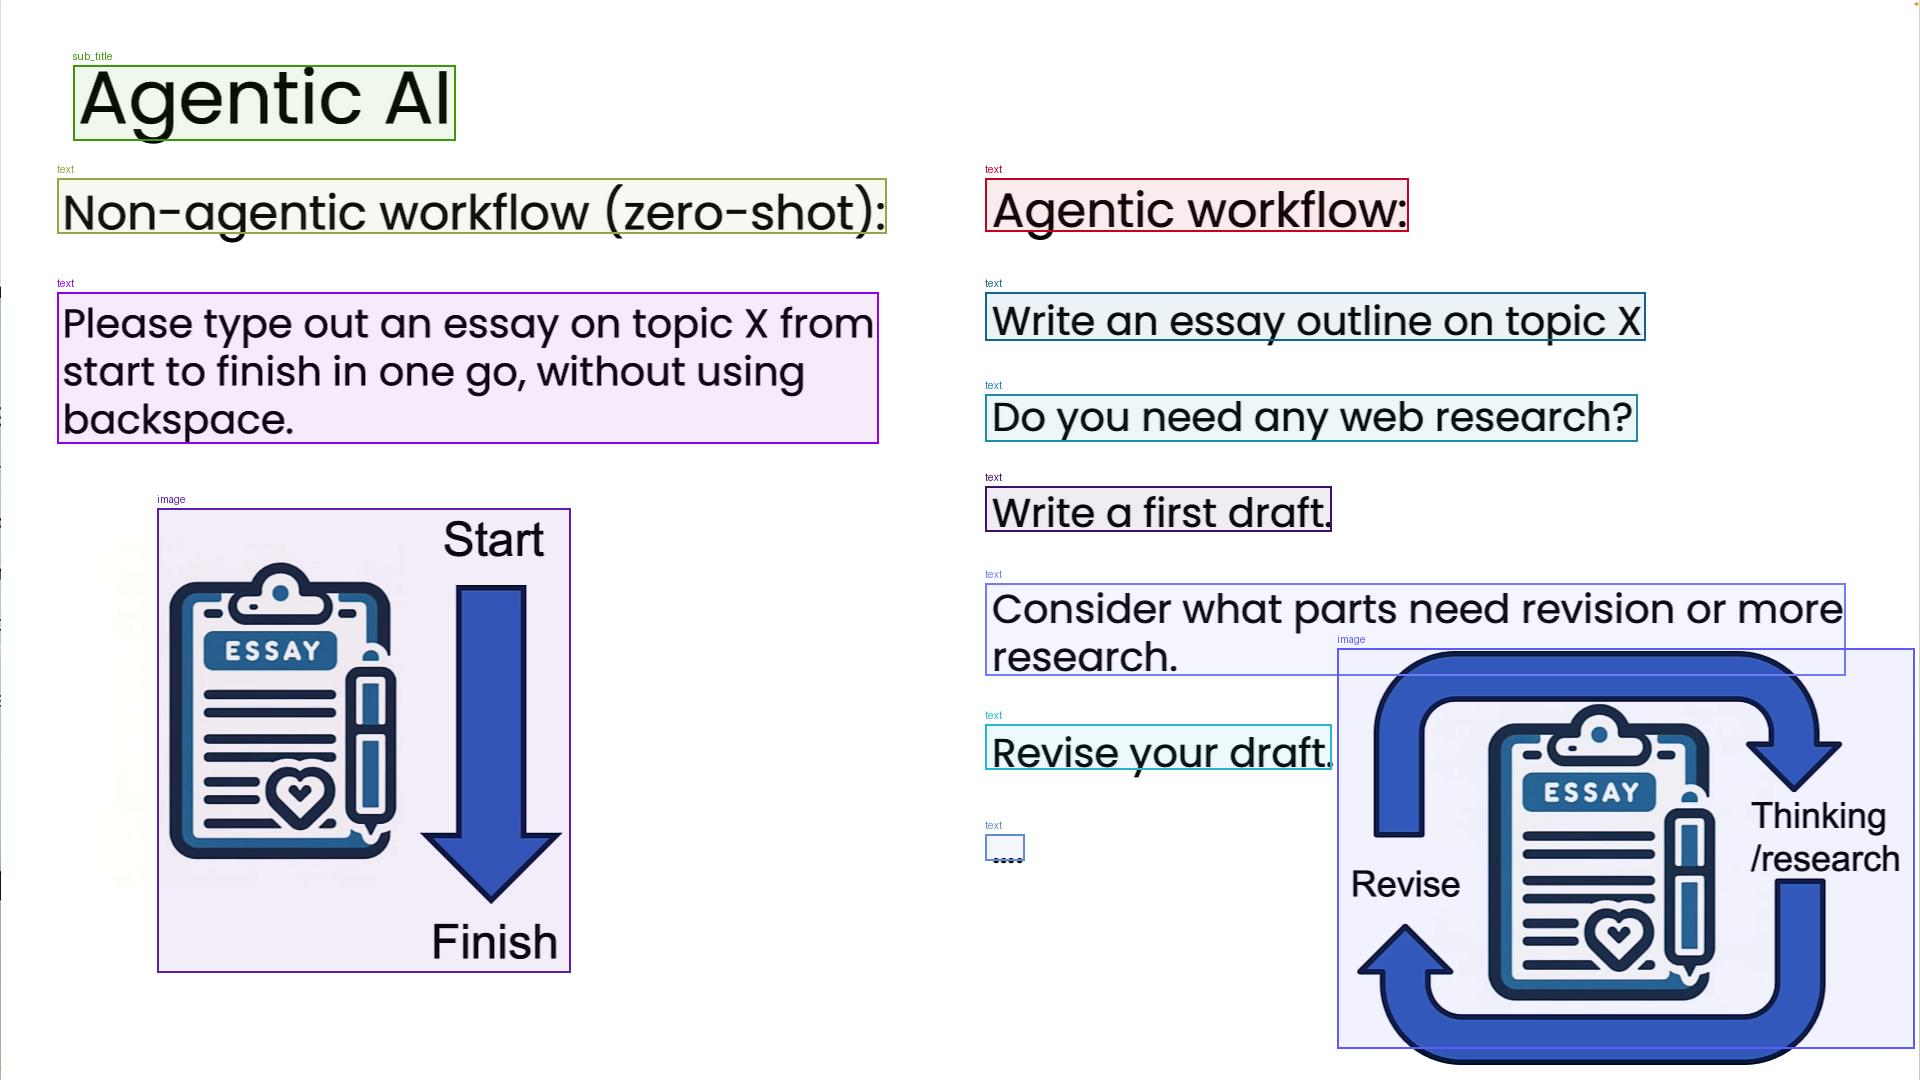

In [13]:
Image("result_with_boxes.jpg", width=640)

<div style="
background: linear-gradient(135deg, #e8f5e9, #f1f8e9);
border: 2px solid #4CAF50;
border-radius: 14px;
padding: 18px;
text-align: center;
color: #1b5e20;
font-family: 'Segoe UI', sans-serif;
font-size: 1.1em;
box-shadow: 0 4px 12px rgba(0,0,0,0.08);
">

<b>📘 Vision Class — Deep Learning & Computer Vision</b><br><br>

🔗 <a href="https://class.vision" target="_blank" style="color:#1b5e20; font-weight:600;">
https://class.vision</a><br><br>

📣 Telegram Channels:<br>
<a href="https://t.me/cvision" target="_blank" style="color:#2e7d32; font-weight:bold;">@cvision</a> |
<a href="https://t.me/class_vision" target="_blank" style="color:#2e7d32; font-weight:bold;">@class_vision</a> |
<a href="https://t.me/llm_huggingface" target="_blank" style="color:#2e7d32; font-weight:bold">@llm_huggingface</a>

</div>
